<a href="https://colab.research.google.com/github/MD-Ryhan/Urdu-Text-Preprocessing/blob/main/Urdu_Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Required Libraries

In [8]:
!pip install urduhack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.8 MB/s eta 0:00:00
  Attempting uninstall: Click
    Found existing installation: click 8.1.3
    Uninstalling click-8.1.3:
      Successfully uninstalled click-8.1.3
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.8.3
    Uninstalling tensorflow-datasets-4.8.3:
      Successfully uninstalled tensorflow-datasets-4.8.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the follow

In [27]:
pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.5/802.5 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=05681815fe2db829dc1f68914244388e818394e96330b8c5832c9a218cb1d702
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [36]:
pip install python-bidi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
pip install arabic-reshaper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Import libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urduhack
import nltk
import spacy
import stanza
from collections import Counter
from wordcloud import WordCloud
from bidi.algorithm import get_display
import arabic_reshaper

#Read Dataset

In [3]:
df = pd.read_excel('Sample.xlsx')
df.head()

,Tweets,label
0,بکواس مت کرو,1
1,تمہاری ہیجڑا فورس ایک نہتے کے سامنے بکری بنی ہ...,1
2,آفیسر سمیتبھارتی فوجی جہنم واصل بنکرز تباہ بھا...,1
3,غدار منافق میر اللہ تمہیں زلیل کرے,1
4,اگست پر آپ بھارت کو کیا پیغام دینا چاہیں گے م...,1


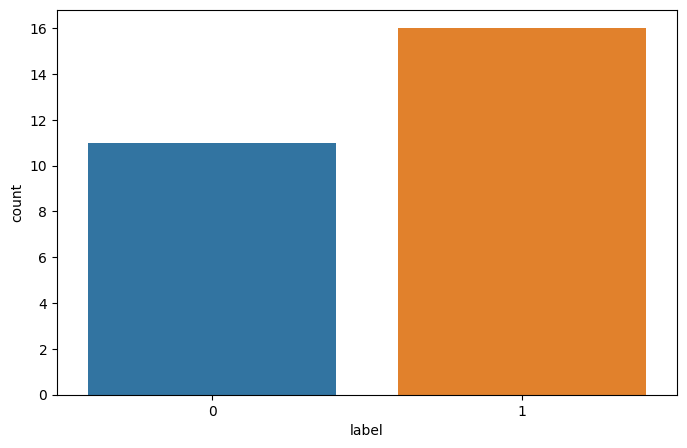

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x="label", data=df)
plt.savefig("categories.png")

plt.show()

#Data Preprocessing


**1.   Remove URDU_PUNCTUATIONS**





In [9]:
URDU_PUNCTUATIONS = ['\200F', '\u200f', '۔', '٫', '٪', '؟', '،', ')', '(', '{', '}', '…', '۔۔۔', '\u002F', '\u003F']
def removing_punctuations(text):
    for i in text:
        if i in URDU_PUNCTUATIONS:
            text = text.replace(i, " ")
    return text

In [11]:
 df['clean_Tweets'] = df['Tweets'].apply(removing_punctuations)
 df.head()

,Tweets,label,clean_Tweets
0,بکواس مت کرو,1,بکواس مت کرو
1,تمہاری ہیجڑا فورس ایک نہتے کے سامنے بکری بنی ہ...,1,تمہاری ہیجڑا فورس ایک نہتے کے سامنے بکری بنی ہ...
2,آفیسر سمیتبھارتی فوجی جہنم واصل بنکرز تباہ بھا...,1,آفیسر سمیتبھارتی فوجی جہنم واصل بنکرز تباہ بھا...
3,غدار منافق میر اللہ تمہیں زلیل کرے,1,غدار منافق میر اللہ تمہیں زلیل کرے
4,اگست پر آپ بھارت کو کیا پیغام دینا چاہیں گے م...,1,اگست پر آپ بھارت کو کیا پیغام دینا چاہیں گے م...




**2.   Remove Urdu StopWords**



In [13]:
stop_words = frozenset("""
آ آئی آئیں آئے آتا آتی آتے آداب آدھ آدھا آدھی آدھے آس
 آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 اتوار ارب اربویں ارے اس اسکا اسکی اسکے اسی اسے اف افوہ الاول البتہ
 الثانی الحرام السلام الف المکرم ان اندر انکا انکی انکے انہوں انہی انہیں
 اوئے اور اوپر اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکبر اکثر اگر اگرچہ
 اگست اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر بج بجے
 بخیر برسات بشرطیکہ بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں
 بھی بہار بہت بہتر بیگم تاکہ تاہم تب تجھ تجھی تجھے ترا تری
 تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے
 تہائی تیرا تیری تیرے تین جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے
 جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے جیٹھ حالانکہ حالاں حصہ حضرت خاطر خالی خدا خزاں خواہ خوب
 خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوشنبہ دوں دکھائیں دگنا دی
 دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے
 رکھا رکھتا رکھتی رکھتے رکھنا رکھنی رکھنے رکھو رکھی رکھے رہ رہا رہتا
 رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سلام سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شام شاید
 شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین فروری فقط فلاں
 فی قبل قطا لائی لائے لاتا لاتی لاتے لانا لانی لایا لو لوجی لوگوں
 لگ لگا لگتا لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن
 لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمی محض مرا مرحبا
 مری مرے مزید مس مسز مسٹر مطابق مطلق مل منٹ منٹوں مکرمی مگر
 مگھر مہربانی میرا میروں میری میرے میں نا نزدیک نما نو نومبر نہ نہیں
 نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ
 وعلیکم وغیرہ ولے وگرنہ وہ وہاں وہی وہیں ویسا ویسے ویں پاس
 پایا پر پس پلیز پون پونا پونی پونے پھاگن پھر پہ پہر پہلا پہلی
 پہلے پیر پیچھے چاہئے چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ
 چوگنی چکی چکیں چکے چہارشنبہ چیت ڈالنی ڈالنے ڈالے کئے کا کاتک کاش کب
 کبھی کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس
 کسی کسے کل کم کن کنہیں کو کوئی کون کونسا کونسے کچھ کہ کہا
 کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے
 گئی گئے گا گرما گرمی گنا گو گویا گھنٹا گھنٹوں گھنٹے گی گیا
 ہائیں ہائے ہاڑ ہاں ہر ہرچند ہرگز ہزار ہفتہ ہم ہمارا ہماری ہمارے ہمی
 ہمیں ہو ہوئی ہوئیں ہوئے ہوا ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی
 ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())


def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in stop_words)

In [15]:
df['clean_Tweets'] =  df['clean_Tweets'].apply(remove_stopwords)
df.head(9)

,Tweets,label,clean_Tweets
0,بکواس مت کرو,1,بکواس
1,تمہاری ہیجڑا فورس ایک نہتے کے سامنے بکری بنی ہ...,1,ہیجڑا فورس نہتے بکری بنی ڈوب مرو
2,آفیسر سمیتبھارتی فوجی جہنم واصل بنکرز تباہ بھا...,1,آفیسر سمیتبھارتی فوجی جہنم واصل بنکرز تباہ بھا...
3,غدار منافق میر اللہ تمہیں زلیل کرے,1,غدار منافق میر اللہ زلیل
4,اگست پر آپ بھارت کو کیا پیغام دینا چاہیں گے م...,1,بھارت پیغام چاہیں گے پیغام ھے کشمیر نکل جاو کت...
5,بھارت کی ایٹمی حملے کی دھمکی,1,بھارت ایٹمی حملے دھمکی
6,قانون کہاں ھے ریاست کہاں ھے انصاف کہاں ھے کسی ...,1,قانون ھے ریاست ھے انصاف ھے الزام سزا فیصلہ ھی ...
7,یہ بے غیرتی چھوڑ دو,1,بے غیرتی چھوڑ
8,اس گشتی کو بھی پھینٹی لگنی چاھیے,1,گشتی پھینٹی لگنی چاھیے


#Removal of all the hashtags, HTML tags, mentions, punctuations, numbers, and URLs using UrduaHack

In [17]:
urduhack.download()

89078/89078 [==============================] - 0s 0us/step


In [18]:
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols, remove_english_alphabets


In [19]:
#Replace one or more spacings with a single space
df['clean_Tweets'] = df['clean_Tweets'].apply(normalize_whitespace)
# Replace all currency symbols in text str with string specified by replace_with str.
df['clean_Tweets'] = df['clean_Tweets'].apply(replace_currency_symbols) 
# Replace all emails in text str with replace_with str.
df['clean_Tweets'] = df['clean_Tweets'].apply(replace_emails)
# Replace all numbers in text str with replace_with str.
df['clean_Tweets'] = df['clean_Tweets'].apply(replace_numbers)
# Replace all URLs in text str with replace_with str.
df['clean_Tweets'] = df['clean_Tweets'].apply(replace_urls)
# Remove accents from any accented unicode characters in text str, either by transforming them into ascii equivalents or removing them entirely.
df['clean_Tweets'] = df['clean_Tweets'].apply(remove_accents)
# To normalize some text, all you need to do pass unicode text.
df['clean_Tweets'] = df['clean_Tweets'].apply(normalize)

df.head(10)

,Tweets,label,clean_Tweets
0,بکواس مت کرو,1,بکواس
1,تمہاری ہیجڑا فورس ایک نہتے کے سامنے بکری بنی ہ...,1,ہیجڑا فورس نہتے بکری بنی ڈوب مرو
2,آفیسر سمیتبھارتی فوجی جہنم واصل بنکرز تباہ بھا...,1,آفیسر سمیتبھارتی فوجی جہنم واصل بنکرز تباہ بھا...
3,غدار منافق میر اللہ تمہیں زلیل کرے,1,غدار منافق میر اللہ زلیل
4,اگست پر آپ بھارت کو کیا پیغام دینا چاہیں گے م...,1,بھارت پیغام چاہیں گے پیغام ھے کشمیر نکل جاو کت...
5,بھارت کی ایٹمی حملے کی دھمکی,1,بھارت ایٹمی حملے دھمکی
6,قانون کہاں ھے ریاست کہاں ھے انصاف کہاں ھے کسی ...,1,قانون ھے ریاست ھے انصاف ھے الزام سزا فیصلہ ھی ...
7,یہ بے غیرتی چھوڑ دو,1,بے غیرتی چھوڑ
8,اس گشتی کو بھی پھینٹی لگنی چاھیے,1,گشتی پھینٹی لگنی چاھیے
9,بدنام ڈاکو منیر مصرانی کا کشمیر میں اپنے پچاس ...,1,بدنام ڈاکو منیر مصرانی کشمیر پچاس دیگر ڈاکوؤں ...


#Lemmatization

In [20]:
from urduhack.models.lemmatizer import lemmatizer

def lemitizeStr(str):
    lemme_str = ""
    temp = lemmatizer.lemma_lookup(str)
    for t in temp:
        lemme_str += t[0] + " "
    
    return lemme_str

In [22]:
df['lemmatized_text'] = df['clean_Tweets'].apply(lemitizeStr)
df.head()

,Tweets,label,clean_Tweets,lemmatized_text
0,بکواس مت کرو,1,بکواس,بکواس
1,تمہاری ہیجڑا فورس ایک نہتے کے سامنے بکری بنی ہ...,1,ہیجڑا فورس نہتے بکری بنی ڈوب مرو,ہیجڑا فورس نہتے بکری بنی ڈوب مرو
2,آفیسر سمیتبھارتی فوجی جہنم واصل بنکرز تباہ بھا...,1,آفیسر سمیتبھارتی فوجی جہنم واصل بنکرز تباہ بھا...,آفیسر سمیتبھارتی فوجی جہنم واصل بنکرز تباہ بھا...
3,غدار منافق میر اللہ تمہیں زلیل کرے,1,غدار منافق میر اللہ زلیل,غدار منافق میر اللہ زلیل
4,اگست پر آپ بھارت کو کیا پیغام دینا چاہیں گے م...,1,بھارت پیغام چاہیں گے پیغام ھے کشمیر نکل جاو کت...,بھارت پیغام چاہیں گے پیغام ھے کشمیر نکل جاو کت...


#Tokenization using Spacy Library

In [24]:
nlp = spacy.blank('ur')
def tokenize(text):
    tokens = nlp(text)
    return  tokens

In [25]:
df['tokens'] = df['lemmatized_text'].apply(tokenize)
df.head(9)

,Tweets,label,clean_Tweets,lemmatized_text,tokens
0,بکواس مت کرو,1,بکواس,بکواس,(بکواس)
1,تمہاری ہیجڑا فورس ایک نہتے کے سامنے بکری بنی ہ...,1,ہیجڑا فورس نہتے بکری بنی ڈوب مرو,ہیجڑا فورس نہتے بکری بنی ڈوب مرو,"(ہیجڑا, فورس, نہتے, بکری, بنی, ڈوب, مرو)"
2,آفیسر سمیتبھارتی فوجی جہنم واصل بنکرز تباہ بھا...,1,آفیسر سمیتبھارتی فوجی جہنم واصل بنکرز تباہ بھا...,آفیسر سمیتبھارتی فوجی جہنم واصل بنکرز تباہ بھا...,"(آفیسر, سمیتبھارتی, فوجی, جہنم, واصل, بنکرز, ت..."
3,غدار منافق میر اللہ تمہیں زلیل کرے,1,غدار منافق میر اللہ زلیل,غدار منافق میر اللہ زلیل,"(غدار, منافق, میر, اللہ, زلیل)"
4,اگست پر آپ بھارت کو کیا پیغام دینا چاہیں گے م...,1,بھارت پیغام چاہیں گے پیغام ھے کشمیر نکل جاو کت...,بھارت پیغام چاہیں گے پیغام ھے کشمیر نکل جاو کت...,"(بھارت, پیغام, چاہیں, گے, پیغام, ھے, کشمیر, نک..."
5,بھارت کی ایٹمی حملے کی دھمکی,1,بھارت ایٹمی حملے دھمکی,بھارت ایٹمی حملے دھمکی,"(بھارت, ایٹمی, حملے, دھمکی)"
6,قانون کہاں ھے ریاست کہاں ھے انصاف کہاں ھے کسی ...,1,قانون ھے ریاست ھے انصاف ھے الزام سزا فیصلہ ھی ...,قانون ھے ریاست ھے انصاف ھے الزام سزا فیصلہ ھی ...,"(قانون, ھے, ریاست, ھے, انصاف, ھے, الزام, سزا, ..."
7,یہ بے غیرتی چھوڑ دو,1,بے غیرتی چھوڑ,بے غیرتی چھوڑ,"(بے, غیرتی, چھوڑ)"
8,اس گشتی کو بھی پھینٹی لگنی چاھیے,1,گشتی پھینٹی لگنی چاھیے,گشتی پھینٹی لگنی چاھیے,"(گشتی, پھینٹی, لگنی, چاھیے)"


#Urdu POS Tagging

In [29]:
nlp = stanza.Pipeline('ur', processors='tokenize,pos')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: ur (Urdu):
| Processor | Package |
-----------------------
| tokenize  | udtb    |
| pos       | udtb    |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Done loading processors!


In [30]:
def tag_verb(text):
    doc = nlp(text)
    sent_list = [sent.text for sent in doc.sentences]
    return([f'{word.text},{word.upos}' for sent in doc.sentences for word in sent.words])

In [31]:
df['Pos_tag'] = df['lemmatized_text'].apply(tag_verb)
df.head(5)

,Tweets,label,clean_Tweets,lemmatized_text,tokens,Pos_tag
0,بکواس مت کرو,1,بکواس,بکواس,(بکواس),"[بکواس,VERB]"
1,تمہاری ہیجڑا فورس ایک نہتے کے سامنے بکری بنی ہ...,1,ہیجڑا فورس نہتے بکری بنی ڈوب مرو,ہیجڑا فورس نہتے بکری بنی ڈوب مرو,"(ہیجڑا, فورس, نہتے, بکری, بنی, ڈوب, مرو)","[ہیجڑا,PROPN, فورس,PROPN, نہتے,PROPN, بکری,NOU..."
2,آفیسر سمیتبھارتی فوجی جہنم واصل بنکرز تباہ بھا...,1,آفیسر سمیتبھارتی فوجی جہنم واصل بنکرز تباہ بھا...,آفیسر سمیتبھارتی فوجی جہنم واصل بنکرز تباہ بھا...,"(آفیسر, سمیتبھارتی, فوجی, جہنم, واصل, بنکرز, ت...","[آفیسر,NOUN, سمیتبھارتی,PROPN, فوجی,NOUN, جہنم..."
3,غدار منافق میر اللہ تمہیں زلیل کرے,1,غدار منافق میر اللہ زلیل,غدار منافق میر اللہ زلیل,"(غدار, منافق, میر, اللہ, زلیل)","[غدار,NOUN, منافق,NOUN, میر,PROPN, اللہ,PROPN,..."
4,اگست پر آپ بھارت کو کیا پیغام دینا چاہیں گے م...,1,بھارت پیغام چاہیں گے پیغام ھے کشمیر نکل جاو کت...,بھارت پیغام چاہیں گے پیغام ھے کشمیر نکل جاو کت...,"(بھارت, پیغام, چاہیں, گے, پیغام, ھے, کشمیر, نک...","[بھارت,PROPN, پیغام,NOUN, چاہیں,VERB, گے,AUX, ..."


#Count POS TAGs In Tweets

In [34]:
#count noun+prnoun tags in each tweet
def tag_verb(text):
    doc = nlp(text)
    sent_list = [sent.text for sent in doc.sentences]
    tags = [f'{word.upos}' for sent in doc.sentences for word in sent.words]
    d = []
    sum = 0
    NOUN = Counter(tag for tag in tags if tag == 'NOUN')
    d += NOUN.values()
    PROPN = Counter(tag for tag in tags if tag == 'PROPN')
    d += PROPN.values()
    for i  in d:
        sum = sum + i
    return sum
df['NOUN'] = df['lemmatized_text'].apply(tag_verb)
df.head(5)

,Tweets,label,clean_Tweets,lemmatized_text,tokens,Pos_tag,NOUN
0,بکواس مت کرو,1,بکواس,بکواس,(بکواس),"[بکواس,VERB]",0
1,تمہاری ہیجڑا فورس ایک نہتے کے سامنے بکری بنی ہ...,1,ہیجڑا فورس نہتے بکری بنی ڈوب مرو,ہیجڑا فورس نہتے بکری بنی ڈوب مرو,"(ہیجڑا, فورس, نہتے, بکری, بنی, ڈوب, مرو)","[ہیجڑا,PROPN, فورس,PROPN, نہتے,PROPN, بکری,NOU...",5
2,آفیسر سمیتبھارتی فوجی جہنم واصل بنکرز تباہ بھا...,1,آفیسر سمیتبھارتی فوجی جہنم واصل بنکرز تباہ بھا...,آفیسر سمیتبھارتی فوجی جہنم واصل بنکرز تباہ بھا...,"(آفیسر, سمیتبھارتی, فوجی, جہنم, واصل, بنکرز, ت...","[آفیسر,NOUN, سمیتبھارتی,PROPN, فوجی,NOUN, جہنم...",6
3,غدار منافق میر اللہ تمہیں زلیل کرے,1,غدار منافق میر اللہ زلیل,غدار منافق میر اللہ زلیل,"(غدار, منافق, میر, اللہ, زلیل)","[غدار,NOUN, منافق,NOUN, میر,PROPN, اللہ,PROPN,...",4
4,اگست پر آپ بھارت کو کیا پیغام دینا چاہیں گے م...,1,بھارت پیغام چاہیں گے پیغام ھے کشمیر نکل جاو کت...,بھارت پیغام چاہیں گے پیغام ھے کشمیر نکل جاو کت...,"(بھارت, پیغام, چاہیں, گے, پیغام, ھے, کشمیر, نک...","[بھارت,PROPN, پیغام,NOUN, چاہیں,VERB, گے,AUX, ...",7


#Word Cloud For Urdu Text

In [62]:
from arabic_reshaper import ArabicReshaper

configuration = {
    "language": "Urdu"
}
reshaper = ArabicReshaper(configuration=configuration)


reshaped_text = reshaper.reshape('urdu text preprocessing using libraries')
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(bidi_text)
wordcloud.to_file("worCloud.png")

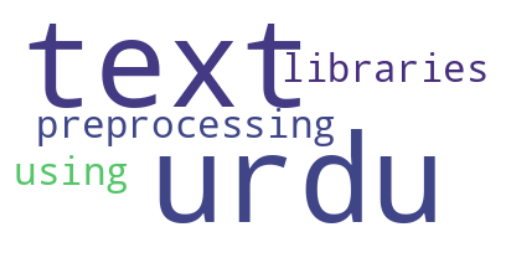

In [63]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()